# <center>Web Scraping Challenge Activity

# <center>Horror Movies Throughout the Years</center>

<img src="horror_films.png">

# Table of Contents

 * [Importing Libraries](#Importing-Libraries)
 * [Making Soup ----------------------------------------  (BeautifulSoup)](#Making-Soup-from-Parsed-HTML-Content)
 * [Horror Movies from Fandom](#Creating-List-of-All-URLs-from-Horror-Movies-on-Fandom)
 * [Web Scraping with a FOR LOOP](#Scraping-with-a-FOR-LOOP)
 * [Creating a Pandas DataFrame from Horror Movies ---------- (movie_df1)](#Creating-a-Pandas-DataFrame-from-Horror-Movies)
 * [Scrapping with a Function ------------------------------ (movie_df2)](#Scrapping-with-a-Function)
 * [Creating SQL Database from Horror Movies ---------- (movie_df3)](#Creating-SQL-Database-from-Horror-Movies)
 * [Resources](#Resources)



# Importing Libraries

In [21]:
import bs4
import requests
import pandas as pd
import time
import random
import math
import sqlite3
import numpy as np

# Making Soup from Parsed HTML Content

<!DOCTYPE doctype html>

<html class="" dir="ltr" lang="en">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width, user-scalable=yes" name="viewport"/>
<meta content="MediaWiki 1.19.24" name="generator">
<meta content="Horror Film Wiki,horrormovies,Alphabetical List of Horror Films,Chronological List of Horror Films,13 Ghosts (1960),1408,1922 (2017 film),2-Headed Shark Attack,3-Headed Shark Attack,28 Days Later,28 Weeks Later,30 Days of Night,47 Meters Down" name="keywords">
<meta content="Contents: Top - 0-9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 0-9 13 Hosts, 1408, 1922, 2-Headed Shark Attack 3-Headed Shark Attack, 3-Headed Shark Attack, 28 Days Later 28 Weeks Later, 28 Weeks Later, 30 Days of Night, 47 Meters Down Dette suger story About that søker story Both det..." name="description"/>
<meta content="summary" name="twitter:card"/>
<meta content="@getfandom" name="twitter:site"/>
<meta content="https://horror.fan
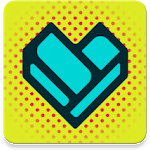
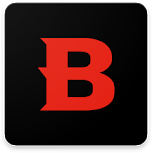

In [22]:
url = 'https://horror.fandom.com/wiki/Alphabetical_List_of_Horror_Films'
page = requests.get(url)
page.content


soup = bs4.BeautifulSoup(page.content, 'html.parser')
soup

In [23]:
movies = soup.find('div',{"id":"mw-content-text"})
movie_list = movies.find_all('ul')
movie_list[1].find('a', href=True)['href']
        

'/wiki/3-Headed_Shark_Attack'

# Creating List of All URLs from Horror Movies on Fandom

In [24]:
movie_links = []
base_url = "https://horror.fandom.com"
for movies in movie_list:
    if len(movies.find_all('a',href=True)) >1:
        for movie in movies:
            link = movie.find('a', href=True)
            if link:
                movie_links.append(base_url + link['href'])
    else:
        link = movies.find('a', href=True)
        if link:
            movie_links.append(base_url + link['href'])
            
print(len(movie_links))
movie_links

609


['https://horror.fandom.com/wiki/13_Ghosts_(1960)',
 'https://horror.fandom.com/wiki/1408',
 'https://horror.fandom.com/wiki/1922_(2017_film)',
 'https://horror.fandom.com/wiki/2-Headed_Shark_Attack',
 'https://horror.fandom.com/wiki/28_Days_Later',
 'https://horror.fandom.com/wiki/30_Days_of_Night',
 'https://horror.fandom.com/wiki/47_Meters_Down',
 'https://horror.fandom.com/wiki/6:66_P.M.',
 'https://horror.fandom.com/wiki/7500',
 'https://horror.fandom.com/wiki/999_-_9999',
 'https://horror.fandom.com/wiki/3-Headed_Shark_Attack',
 'https://horror.fandom.com/wiki/28_Weeks_Later',
 'https://horror.fandom.com/wiki/47_Meters_Down:_The_Next_Chapter',
 'https://horror.fandom.com/wiki/A_Quiet_Place',
 'https://horror.fandom.com/wiki/Abominable_Dr._Phibes',
 'https://horror.fandom.com/wiki/Abbott_and_Costello_Meet_Frankenstein',
 'https://horror.fandom.com/wiki/Abbott_and_Costello_Meet_the_Invisible_Man',
 'https://horror.fandom.com/wiki/Abbott_and_Costello_Meet_the_Mummy',
 'https://horro

# Scraping with a FOR LOOP

In [25]:
titles = []
release_dates = []
num_deaths = []
num_on_screen_deaths = []
revenues = []
lengths = []

for url in movie_links[:10]: # Looping through all movie urls listed on the site
    
    # Requesting page and parsing html content
    page = requests.get(url)
    soup = bs4.BeautifulSoup(page.content, 'html.parser')
    
    # Pulling title from page and added to titles list
    title = soup.find('h1', attrs={"class":'page-header__title'}).text
    titles.append(title)
    print(title, url)
    
    # Pulling release date updating list
    release_day = soup.find('div',text='Release Date(s)')
    if release_day is not None:
        release_date = release_day.find_next('div').text.strip()
        release_dates.append(release_date)
    else:
        release_dates.append('Missing')
    print('Release date available?', bool(release_day), release_date)

    # Pulling table for deaths (if any )and updating list
    any_deaths = soup.find('table', attrs={"class":'mw-collapsible'})
    if any_deaths is not None:
        deaths = len(pd.read_html(str(any_deaths))[0])
        num_deaths.append(deaths)
    else:
        num_deaths.append('Missing')
    print("Any deaths available?", bool(any_deaths))

    # Pulling table for deaths on screen (if any) and updating list
    any_deaths_on_screen = soup.find('table', attrs={"class":'mw-collapsible'})
    if any_deaths_on_screen is not None:
        on_screen_deaths = pd.read_html(str(any_deaths_on_screen))[0]
        if 'On Screen' in on_screen_deaths.columns:
            num_on_screen_deaths.append(
                len(on_screen_deaths[on_screen_deaths['On Screen'] == 'Yes']))
        else:
            num_on_screen_deaths.append('Missing')   
    else:
        num_on_screen_deaths.append('Missing') 
    print("Any on screen deaths available?", bool(any_deaths_on_screen))
    
    # Pulling revenue updating list
    rev = soup.find('div', text = ("Gross" or "Budget"))
    if rev is not None:
        revenue = rev.find_next('div').text.strip()
        revenues.append(revenue)
    else:
          revenues.append('Missing')
    print('Money made available?', bool(revenue))

    # Pulling Runtime and updating list
    leng = soup.find('div', text='Runtime')
    if leng is not None:
        length = leng.find_next('div').text.strip()
        lengths.append(length) 
    else:
        lengths.append('Missing')
    print('Runtime available?', bool(length), '\n')
    


13 Ghosts (1960) https://horror.fandom.com/wiki/13_Ghosts_(1960)
Release date available? True July 10, 1960
Any deaths available? False
Any on screen deaths available? False
Money made available? True
Runtime available? True 

1408 https://horror.fandom.com/wiki/1408
Release date available? True June 22, 2007
Any deaths available? False
Any on screen deaths available? False
Money made available? True
Runtime available? True 

1922 (2017 film) https://horror.fandom.com/wiki/1922_(2017_film)
Release date available? True 23 September 2017 (Fantastic Fest)20 October 2017 (Netflix)
Any deaths available? False
Any on screen deaths available? False
Money made available? True
Runtime available? True 

2-Headed Shark Attack https://horror.fandom.com/wiki/2-Headed_Shark_Attack
Release date available? True January 31, 2012
Any deaths available? False
Any on screen deaths available? False
Money made available? True
Runtime available? True 

28 Days Later https://horror.fandom.com/wiki/28_Days_Late

# Creating a Pandas DataFrame from Horror Movies

In [26]:
movie_df = pd.DataFrame()
movie_df['Title'] = titles
movie_df['Release Date'] = release_dates
movie_df['# of Deaths'] = num_deaths
movie_df['On Screen Deaths'] = num_on_screen_deaths
movie_df['Revenue'] = revenues
movie_df['Length'] = lengths
movie_df.head()

,Title,Release Date,# of Deaths,On Screen Deaths,Revenue,Length
0,13 Ghosts (1960),"July 10, 1960",Missing,Missing,"$1,500,000 (USA/Canada)",85 minutes82 minutes (black-and-white version)
1,1408,"June 22, 2007",Missing,Missing,"$131,998,242","106 minutes, 112 miniutes (Unrated)"
2,1922 (2017 film),23 September 2017 (Fantastic Fest)20 October 2...,Missing,Missing,Missing,101 min.
3,2-Headed Shark Attack,"January 31, 2012",Missing,Missing,Missing,88 minutes
4,28 Days Later,1 November 2002 (United Kingdom)27 June 2003 (...,Missing,Missing,"£52,833,190.55 ($82,719,885)",113 minutes


# Scraping with a Function

In [27]:
def get_movie_info(url):
    response = requests.get(url, headers=headers)
    print(response.status_code, url)
    
    soup = bs4.BeautifulSoup(response.content, 'html.parser')
    title = soup.find('h1', attrs={"class":'page-header__title'}).text
    print("Movie Title:", title)
    
    # Pulling release date updating list
    release_day = soup.find('div',text='Release Date(s)')
    if release_day is not None:
        release_date = release_day.find_next('div').text.split("(")[0].strip()
        print('Release Date Found')
    else:
        release_date = None
        print('Release Date Missing')

    # Pulling table for deaths (if any )and updating list
    any_deaths = soup.find('table', attrs={"class":'mw-collapsible'})
    if any_deaths is not None:
        deaths = len(pd.read_html(str(any_deaths))[0])
        print('Number of Deaths Found')
    else:
        deaths = None
        print("Number of Deaths Missing")

    # Pulling table for deaths on screen (if any) and updating list
    any_deaths_on_screen = soup.find('table', attrs={"class":'mw-collapsible'})
    if any_deaths_on_screen is not None:
        on_screen_death = pd.read_html(str(any_deaths_on_screen))[0]
        if 'On Screen' in on_screen_death.columns:
            on_screen_deaths = len(on_screen_death[on_screen_death['On Screen'] == 'Yes'])
            print('Number of On-Screen Deaths Found')
        else:
            on_screen_deaths = None
            print('Number of On-Screen Deaths Missing')
    else:
        on_screen_deaths = None
        print('Number of On-Screen Deaths Missing')
    
    # Pulling revenue updating list
    rev = soup.find('div', text = ("Gross" or "Budget"))
    if rev is not None:
        if rev.find_next('div') is not None:
            revenue = rev.find_next('div').text.strip()
            print('Revenue or Budget Found')
    else:
        revenue = None
        print('Revenue or Budget Missing')

    # Pulling Runtime and updating list
    leng = soup.find('div', text='Runtime')
    if leng is not None:
        length = leng.find_next('div').text.split()[0].strip()
        print('Runtime Found')
    else:
        length = None
        print('Runtime Not Found')
          
    print('Movie Scrap Completed')
    return title, release_date, deaths, on_screen_deaths, revenue, length

In [28]:
headers = {'User-agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36'}
sleep_min = 0
sleep_max = 5

In [29]:
now = time.time()
titles = []
release_dates = []
num_deaths = []
num_on_screen_deaths = []
revenues = []
lengths = []


for i,url in enumerate(movie_links):
    title, release_date, deaths, on_screen_deaths, revenue, length = get_movie_info(url)
    
    titles.append(title)
    release_dates.append(release_date)
    num_deaths.append(deaths)
    num_on_screen_deaths.append(on_screen_deaths)
    revenues.append(revenue)
    lengths.append(length)
    print("{} out of {} | ".format(i+1,len(movie_links)), round(((i+1)/len(movie_links))*100, 2),"%")
    print('\nTime Elapsed:', time.time()-now, 'seconds.')
    time.sleep(random.uniform(sleep_min, sleep_max))
    print("""
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( \
(____( \X( mrf /||\  
   / /||\ \
   \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          """*3,'\n')




200 https://horror.fandom.com/wiki/13_Ghosts_(1960)
Movie Title: 13 Ghosts (1960)
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Found
Runtime Found
Movie Scrap Completed
1 out of 609 |  0.16 %

Time Elapsed: 0.26021313667297363 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /|

Movie Title: Flight 7500
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Found
Runtime Found
Movie Scrap Completed
9 out of 609 |  1.48 %

Time Elapsed: 21.572492837905884 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/Abbott_and_Costello_Meet_the_Mummy
Movie Title: Abbott and Costello Meet the Mummy
Release Date Found
Number of Deaths Missing
Numb

Movie Title: American Mary
Release Date Found
Number of Deaths Found
Number of On-Screen Deaths Found
Revenue or Budget Missing
Runtime Found
Movie Scrap Completed
25 out of 609 |  4.11 %

Time Elapsed: 64.31960105895996 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |

Movie Title: Apollo 18
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Found
Runtime Found
Movie Scrap Completed
33 out of 609 |  5.42 %

Time Elapsed: 84.36356210708618 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X|

Number of Deaths Found
Number of On-Screen Deaths Found
Revenue or Budget Found
Runtime Found
Movie Scrap Completed
41 out of 609 |  6.73 %

Time Elapsed: 105.92104887962341 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
       

Movie Title: Amityville: The Awakening
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Found
Runtime Found
Movie Scrap Completed
49 out of 609 |  8.05 %

Time Elapsed: 123.68327498435974 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
  

Movie Title: Beneath
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Missing
Runtime Found
Movie Scrap Completed
57 out of 609 |  9.36 %

Time Elapsed: 135.45222902297974 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X

Number of Deaths Found
Number of On-Screen Deaths Found
Revenue or Budget Found
Runtime Found
Movie Scrap Completed
65 out of 609 |  10.67 %

Time Elapsed: 154.45876693725586 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
      

Movie Title: Blood Rage
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Missing
Runtime Found
Movie Scrap Completed
73 out of 609 |  11.99 %

Time Elapsed: 180.4892828464508 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
   

Movie Title: Bride of Frankenstein
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Missing
Runtime Found
Movie Scrap Completed
81 out of 609 |  13.3 %

Time Elapsed: 206.26852703094482 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/Book_of_Shadows:_Blair_Witch_2
Movie Title: Book of Shadows: Blair Witch 2
Release Date Found
Number of Deaths Found
Number of On-S

Movie Title: Carnival of Souls (1998)
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Missing
Runtime Found
Movie Scrap Completed
97 out of 609 |  15.93 %

Time Elapsed: 240.2827501296997 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
 

Number of On-Screen Deaths Missing
Revenue or Budget Found
Runtime Found
Movie Scrap Completed
105 out of 609 |  17.24 %

Time Elapsed: 269.2624249458313 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200

Movie Title: Creepshow
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Found
Runtime Found
Movie Scrap Completed
113 out of 609 |  18.56 %

Time Elapsed: 293.02096605300903 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    

Movie Title: Cabin Fever 2: Spring Fever
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Missing
Runtime Found
Movie Scrap Completed
121 out of 609 |  19.87 %

Time Elapsed: 317.75415682792664 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )| 


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/Children_of_the_Corn_III:_Urban_Harvest
Movie Title: Children of the Corn III: Urban Harvest
Release Date Found
Number of Deaths Mi

Movie Title: Child's Play 2
Release Date Found
Number of Deaths Found
Number of On-Screen Deaths Found
Revenue or Budget Found
Runtime Found
Movie Scrap Completed
136 out of 609 |  22.33 %

Time Elapsed: 358.3391489982605 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    

Number of On-Screen Deaths Missing
Revenue or Budget Found
Runtime Found
Movie Scrap Completed
144 out of 609 |  23.65 %

Time Elapsed: 371.7436270713806 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200

Movie Title: Dead Snow
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Found
Runtime Found
Movie Scrap Completed
152 out of 609 |  24.96 %

Time Elapsed: 396.0627250671387 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |

Number of Deaths Found
Number of On-Screen Deaths Found
Revenue or Budget Missing
Runtime Not Found
Movie Scrap Completed
160 out of 609 |  26.27 %

Time Elapsed: 414.49121379852295 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)

Movie Title: Down
Release Date Found
Number of Deaths Found
Number of On-Screen Deaths Missing
Revenue or Budget Missing
Runtime Found
Movie Scrap Completed
168 out of 609 |  27.59 %

Time Elapsed: 438.48833298683167 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (

Runtime Found
Movie Scrap Completed
176 out of 609 |  28.9 %

Time Elapsed: 456.93701004981995 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/Dracula_vs._Frankenstein
Mo

Movie Title: The Evil Dead (1981)
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Found
Runtime Found
Movie Scrap Completed
184 out of 609 |  30.21 %

Time Elapsed: 472.7965610027313 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_

192 out of 609 |  31.53 %

Time Elapsed: 497.78843879699707 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/Final_Destination
Movie Title: Final Destination
Release Date 

Movie Title: Frankenstein 1970
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Missing
Runtime Found
Movie Scrap Completed
200 out of 609 |  32.84 %

Time Elapsed: 517.8269000053406 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/Friday_the_13th_(2009)
Movie Title: Friday the 13th (2009)
Release Date Found
Number of Deaths Found
Number of On-Screen Deaths Fou


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/Feast_2:_Sloppy_Seconds
Movie Title: Feast 2: Sloppy Seconds
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths

Movie Title: Friday the 13th Part 2 (Disambiguation)
Release Date Missing
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Missing
Runtime Not Found
Movie Scrap Completed
223 out of 609 |  36.62 %

Time Elapsed: 574.0079660415649 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/The_Gallows
Movie Title: The Gallows
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budg

Movie Title: Ghost in a Teeny Bikini
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Missing
Runtime Found
Movie Scrap Completed
238 out of 609 |  39.08 %

Time Elapsed: 616.5004279613495 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
 


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/Halloween_(1978)
Movie Title: Halloween (1978)
Release Date Found
Number of Deaths Found
Number of On-Screen Deaths Found
Revenue o

Movie Title: Hatchet
Release Date Found
Number of Deaths Found
Number of On-Screen Deaths Found
Revenue or Budget Found
Runtime Found
Movie Scrap Completed
254 out of 609 |  41.71 %

Time Elapsed: 661.5581669807434 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/The_Horror_of_Frankenstein
Movie Title: The Horror of Frankenstein
Release Date Found
Number of Deaths Missing
Number of On-Screen 


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/Housewives_from_Another_World
Movie Title: Housewives from Another World
Release Date Found
Number of Deaths Missing
Number of On-S

Movie Title: Halloween 5: The Revenge of Michael Myers
Release Date Found
Number of Deaths Found
Number of On-Screen Deaths Found
Revenue or Budget Found
Runtime Found
Movie Scrap Completed
278 out of 609 |  45.65 %

Time Elapsed: 727.1035959720612 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
 


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/Hellraiser:_Bloodline
Movie Title: Hellraiser: Bloodline
Release Date Found
Number of Deaths Found
Number of On-Screen Deaths Found

Movie Title: Hostel: Part II
Release Date Found
Number of Deaths Found
Number of On-Screen Deaths Found
Revenue or Budget Found
Runtime Found
Movie Scrap Completed
293 out of 609 |  48.11 %

Time Elapsed: 777.1642031669617 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
   


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/Imprint
Movie Title: Imprint
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Missi

200 https://horror.fandom.com/wiki/It_(2017_film)
Movie Title: It (2017)
Release Date Found
Number of Deaths Found
Number of On-Screen Deaths Found
Revenue or Budget Found
Runtime Found
Movie Scrap Completed
308 out of 609 |  50.57 %

Time Elapsed: 816.8140370845795 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \_____


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/Jack_Frost
Movie Title: Jack Frost
Release Date Found
Number of Deaths Found
Number of On-Screen Deaths Missing
Revenue or Budget M


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/Jack_Frost_2:_Revenge_of_the_Mutant_Killer_Snowman
Movie Title: Jack Frost 2: Revenge of the Mutant Killer Snowman
Release Date Mis


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/Kristy
Movie Title: Kristy
Release Date Missing
Number of Deaths Found
Number of On-Screen Deaths Found
Revenue or Budget Missing
R

Movie Title: The Lazarus Effect
Release Date Found
Number of Deaths Found
Number of On-Screen Deaths Found
Revenue or Budget Found
Runtime Found
Movie Scrap Completed
339 out of 609 |  55.67 %

Time Elapsed: 914.5981619358063 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|



        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/Lake_Placid_3
Movie Title: Lake Placid 3
Release Date Missing
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue o

200 https://horror.fandom.com/wiki/Mama
Movie Title: Mama
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Found
Runtime Found
Movie Scrap Completed
355 out of 609 |  58.29 %

Time Elapsed: 953.7246391773224 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | 

Movie Title: The Monster Squad
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Found
Runtime Found
Movie Scrap Completed
363 out of 609 |  59.61 %

Time Elapsed: 973.8063759803772 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  

Movie Title: Needful Things
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Missing
Runtime Found
Movie Scrap Completed
371 out of 609 |  60.92 %

Time Elapsed: 994.2568769454956 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/A_Nightmare_on_Elm_Street_3:_Dream_Warriors
Movie Title: A Nightmare on Elm Street 3: Dream Warriors
Release Date Found
Number of D


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/Ouija_(2014)
Movie Title: Ouija
Release Date Missing
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget 


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/Paranormal_Activity_4
Movie Title: Paranormal Activity 4
Release Date Missing
Number of Deaths Missing
Number of On-Screen Deaths M

Movie Title: Piranha (1995)
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Missing
Runtime Found
Movie Scrap Completed
402 out of 609 |  66.01 %

Time Elapsed: 1064.0491659641266 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/The_Prowler_(1981_film)
Movie Title: The Prowler
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Rev

Movie Title: The Purge
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Found
Runtime Found
Movie Scrap Completed
418 out of 609 |  68.64 %

Time Elapsed: 1108.0165710449219 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    

200 https://horror.fandom.com/wiki/Poltergeist_(2015)
Movie Title: Poltergeist (2015)
Release Date Missing
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Missing
Runtime Not Found
Movie Scrap Completed
426 out of 609 |  69.95 %

Time Elapsed: 1129.4329409599304 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf 


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/The_Purge:_Anarchy
Movie Title: The Purge: Anarchy
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
R


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/REC
Movie Title: REC
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Found
Runtime


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/The_Ruins_(film)
Movie Title: The Ruins
Release Date Found
Number of Deaths Found
Number of On-Screen Deaths Found
Revenue or Budge

Movie Title: Saw
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Found
Runtime Found
Movie Scrap Completed
457 out of 609 |  75.04 %

Time Elapsed: 1224.7449309825897 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X

Movie Title: Silent Hill
Release Date Missing
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Found
Runtime Found
Movie Scrap Completed
465 out of 609 |  76.35 %

Time Elapsed: 1249.1914451122284 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|


200 https://horror.fandom.com/wiki/Sleepy_Hollow
Movie Title: Sleepy Hollow
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Missing
Runtime Found
Movie Scrap Completed
473 out of 609 |  77.67 %

Time Elapsed: 1273.6266100406647 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\

200 https://horror.fandom.com/wiki/Stay_Alive
Movie Title: Stay Alive
Release Date Missing
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Missing
Runtime Not Found
Movie Scrap Completed
481 out of 609 |  78.98 %

Time Elapsed: 1295.3500249385834 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/Saw_II
Movie Title: Saw II
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Found
R

Movie Title: Scream 3
Release Date Found
Number of Deaths Found
Number of On-Screen Deaths Found
Revenue or Budget Found
Runtime Found
Movie Scrap Completed
496 out of 609 |  81.44 %

Time Elapsed: 1333.2625160217285 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/Stepfather_III_1992
Movie Title: Stepfather III
Release Date Missing
Number of Deaths Missing
Number of On-Screen Deaths Missing
Re

200 https://horror.fandom.com/wiki/The_Texas_Chain_Saw_Massacre
Movie Title: The Texas Chain Saw Massacre (1974)
Release Date Found
Number of Deaths Found
Number of On-Screen Deaths Found
Revenue or Budget Found
Runtime Found
Movie Scrap Completed
511 out of 609 |  83.91 %

Time Elapsed: 1382.8274540901184 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( 


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/The_Omen
Movie Title: The Omen (1976)
Release Date Missing
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or B

Movie Title: Texas Chainsaw 3D
Release Date Found
Number of Deaths Found
Number of On-Screen Deaths Found
Revenue or Budget Found
Runtime Found
Movie Scrap Completed
526 out of 609 |  86.37 %

Time Elapsed: 1422.6092031002045 seconds.


/Users/jacobtadesse/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)



        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/Texas_Chainsaw_Massacre:_The_Next_Generation
Movie Title: Texas Chainsaw Massacre: The Next Generation
Release Date Found
Number of


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/Underworld:_Evolution
Movie Title: Underworld: Evolution
Release Date Missing
Number of Deaths Missing
Number of On-Screen Deaths M


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/The_Visit
Movie Title: The Visit
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget M


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/When_a_Stranger_Calls_Back
Movie Title: When a Stranger Calls Back
Release Date Missing
Number of Deaths Missing
Number of On-Scree

200 https://horror.fandom.com/wiki/The_Witches
Movie Title: The Witches
Release Date Missing
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Missing
Runtime Not Found
Movie Scrap Completed
558 out of 609 |  91.63 %

Time Elapsed: 1515.6036748886108 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /|


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/Wishmaster_2:_Evil_Never_Dies
Movie Title: Wishmaster 2: Evil Never Dies
Release Date Found
Number of Deaths Missing
Number of On-S

Number of Deaths Found
Number of On-Screen Deaths Found
Revenue or Budget Missing
Runtime Found
Movie Scrap Completed
574 out of 609 |  94.25 %

Time Elapsed: 1566.0674450397491 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
   

200 https://horror.fandom.com/wiki/Day_of_the_Dead
Movie Title: Day of the Dead (1985)
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Found
Runtime Found
Movie Scrap Completed
582 out of 609 |  95.57 %

Time Elapsed: 1586.8193821907043 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  



        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/Halloween_II
Movie Title: Halloween II (1981)
Release Date Found
Number of Deaths Found
Number of On-Screen Deaths Found
Revenue or

Movie Title: Howling II: Your Sister Is a Werewolf
Release Date Found
Number of Deaths Missing
Number of On-Screen Deaths Missing
Revenue or Budget Missing
Runtime Found
Movie Scrap Completed
597 out of 609 |  98.03 %

Time Elapsed: 1626.4336521625519 seconds.

        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ | 


        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
           

200 https://horror.fandom.com/wiki/Phantasm_II
Movie Title: Phantasm II
Release Date Found
Number of Deaths Found
Number of On-Screen Deaths Found
Revenue or Budget F

In [30]:
movie_df2 = pd.DataFrame()
movie_df2['Title'] = titles
movie_df2['Release Date'] = release_dates
movie_df2['# of Deaths'] = num_deaths
movie_df2['On Screen Deaths'] = num_on_screen_deaths
movie_df2['Revenue'] = revenues
movie_df2['Runtime (Minutes)'] = lengths
movie_df2.head()

,Title,Release Date,# of Deaths,On Screen Deaths,Revenue,Runtime (Minutes)
0,13 Ghosts (1960),"July 10, 1960",NaN,NaN,"$1,500,000 (USA/Canada)",85
1,1408,"June 22, 2007",NaN,NaN,"$131,998,242",106
2,1922 (2017 film),23 September 2017,NaN,NaN,None,101
3,2-Headed Shark Attack,"January 31, 2012",NaN,NaN,None,88
4,28 Days Later,1 November 2002,NaN,NaN,"£52,833,190.55 ($82,719,885)",113


In [38]:
movie_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 6 columns):
Title                609 non-null object
Release Date         474 non-null object
# of Deaths          169 non-null float64
On Screen Deaths     158 non-null float64
Revenue              301 non-null object
Runtime (Minutes)    485 non-null object
dtypes: float64(2), object(4)
memory usage: 28.6+ KB


# Creating SQL Database from Horror Movies

In [39]:
# Initializing
conn = sqlite3.connect('movies2.db')
cur = conn.cursor()

In [40]:
# Creating table
movie_df2 = pd.DataFrame()
movie_df2['Title'] = titles
movie_df2['Release Date'] = release_dates
movie_df2['# of Deaths'] = num_deaths
movie_df2['On Screen Deaths'] = num_on_screen_deaths
movie_df2['Revenue'] = revenues
movie_df2['Runtime (Minutes)'] = lengths

cur.execute('''
            CREATE TABLE movies2(
            Title INT PRIMARY KEY,
            Release_Date TEXT,
            Num_Deaths INT,
            On_Screen_Deaths INT,
            Revenue TEXT,
            Runtime INT
            )
            ''')

In [41]:
for title, release_date, num_death, num_on_screen_death, revenue, length in zip(
    titles, release_dates, num_deaths, num_on_screen_deaths, revenues, lengths):
    cur.execute('''
                INSERT OR REPLACE INTO movies2
                VALUES(?, ?, ?, ?, ?, ?)
                ''',(title, release_date, num_death, num_on_screen_death, revenue, length))

In [42]:
cur.execute('''
            SELECT * FROM movies2''')
x = cur.fetchall()
movie_df3 = pd.DataFrame(x)
movie_df3.columns = [i[0] for i in cur.description]
movie_df3

,Title,Release_Date,Num_Deaths,On_Screen_Deaths,Revenue,Runtime
0,13 Ghosts (1960),"July 10, 1960",NaN,NaN,"$1,500,000 (USA/Canada)",85
1,1408,"June 22, 2007",NaN,NaN,"$131,998,242",106
2,1922 (2017 film),23 September 2017,NaN,NaN,None,101
3,2-Headed Shark Attack,"January 31, 2012",NaN,NaN,None,88
4,28 Days Later,1 November 2002,NaN,NaN,"£52,833,190.55 ($82,719,885)",113
5,30 Days of Night,"October 19, 2007",NaN,NaN,"$75,304,357",113
6,47 Meters Down,12 June 2017,2.0,NaN,$61.700.000,89
7,6:66 P.M.,2016,NaN,NaN,None,None
8,Flight 7500,"June 11, 2014",NaN,NaN,"2,871,035",97
9,999 - 9999,"September 20, 2002",7.0,5.0,None,103


In [43]:
conn.commit()

# RESOURCES

In [44]:
print('Igor - Frankenstein Junior by Morfina', 'https://www.asciiart.eu/movies/other'"""
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( \
(____( \X( mrf /||\  
   / /||\ \
   \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          """)

Igor - Frankenstein Junior by Morfina https://www.asciiart.eu/movies/other
        .WWWW.
       WWWW""'
     .WWWW O O
  .WWWW"WW.'-. 
 WWWWWWWWWWWWW.
WWWWWWWWWWWWWWW
"WWWWWWWWWW"'\___
 /  /__ __/\___( (____( \X( mrf /||\  
   / /||\    \______/
    \ | \ |  
     )|  \|
    (_|  /|
    |X| (X|  
    |X| |X'._  
   (__| (____)
          
          


In [ ]:
print('Web Scraping Lesson - Students', '\nWeb Scraping Demo With SQL','\nby Matt Sparr', 
'\nhttps://github.com/matthewsparr/Data-Science-Lessons/tree/master/Web%20Scraping')